# CMS Open Data Tutorial

## [4th African Conference on Fundamental Physics and Applications](https://africanschoolofphysics.org/acp2025/)

What we cover here:

* What's available from CMS on the open data portal and how to find it
* The `cernopendata-client` and how to use it
* What's in the CMS NANOAOD format and how to use it
* How to make some simple selections on the data and plot results

**NOTE:** If you are running this in Google Colab run the following command:

In [ ]:
!pip install -r https://raw.githubusercontent.com/cms-dpoa/cms-acp-tutorial/main/requirements.txt

## CMS Open Data and the CERN Open Data Portal

Before we do anything let's go to the [CERN Open Data Portal](https://opendata.cern.ch/) and discover what open data and resources are available.

## Accessing data: the `cernopendata-client`

The [cernopendata-client](https://cernopendata-client.readthedocs.io/en/latest/) is a useful command line tool for accessing data in the CERN Open Data Portal.

Let's run the command with the help option:

In [1]:
!cernopendata-client --help

Usage: cernopendata-client [OPTIONS] COMMAND [ARGS]...

  Command-line client for interacting with CERN Open Data portal.

Options:
  --help  Show this message and exit.

Commands:
  download-files      Download data files belonging to a record.
  get-file-locations  Get a list of data file locations of a record.
  get-metadata        Get metadata content of a record.
  list-directory      List contents of a EOSPUBLIC Open Data directory.
  verify-files        Verify downloaded data file integrity.
  version             Return cernopendata-client version.


Recall that each CMS dataset is associated to a record on the CODP. Let's select a DoubleMuon NANOAOD dataset:

[DoubleMuon primary dataset in NANOAOD format from RunH of 2016](https://opendata.cern.ch/record/30555)

which is record number 30555.

A typical DoubleMuon event (albeit from 2012) looks like this in a visualization:

![dimuon](imgs/doublemuon.png)

With the CLI we can list the metadata for this dataset:

In [ ]:
!cernopendata-client get-metadata --recid 30555

Let's list the files available in this record:

In [2]:
!cernopendata-client get-file-locations --recid 30555 --verbose

http://opendata.cern.ch/eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/127C2975-1B1C-A046-AABF-62B77E757A86.root	2016828178	adler32:eff37065
http://opendata.cern.ch/eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/183BFB78-7B5E-734F-BBF5-174A73020F89.root	2010323460	adler32:78b69eb2
http://opendata.cern.ch/eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/790F8A75-8256-3B46-8209-850DE0BE3C77.root	1643033529	adler32:74252daa
http://opendata.cern.ch/eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/7F53D1DE-439E-AD48-871E-D3458DABA798.root	1913547715	adler32:52ca2e8a
http://opendata.cern.ch/eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/8A696857-C147-B04A-905A-F85FB76EDA23.root	2448295089	adler32:e3c02800
http://opendata.cern.ch/eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/8B253755

By default the files are given with the HTTP protocol. If you wish to use XRootD:

In [3]:
!cernopendata-client get-file-locations --recid 30555 --protocol xrootd --verbose

root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/127C2975-1B1C-A046-AABF-62B77E757A86.root	2016828178	adler32:eff37065
root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/183BFB78-7B5E-734F-BBF5-174A73020F89.root	2010323460	adler32:78b69eb2
root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/790F8A75-8256-3B46-8209-850DE0BE3C77.root	1643033529	adler32:74252daa
root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/7F53D1DE-439E-AD48-871E-D3458DABA798.root	1913547715	adler32:52ca2e8a
root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/8A696857-C147-B04A-905A-F85FB76EDA23.root	2448295089	adler32:e3c02800
root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510

Let's fetch the available files from a record and output them to a list:

In [4]:
import os
import subprocess

recid = 30555

command = ['cernopendata-client', 'get-file-locations', '--recid', f'{recid}', '--verbose']
result = subprocess.run(command, capture_output=True, text=True)
root_files = result.stdout.splitlines()
root_files = [f.split('\t') for f in root_files]

Now let's download a file, one of the smaller ones. Note that the `cernopendata-client` has a download files option (see below).

But here we will use the `curl` command instead via `subprocess`.

In [ ]:
!cernopendata-client download-files --help

Let's select a file (< 1 GB) and download it using `curl`:

In [6]:
fns = [(f[0],f[1]) for f in root_files if int(f[1]) < 1000e6]
fns

[('http://opendata.cern.ch/eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/1BE226A3-7A8D-1B43-AADC-201B563F3319.root',
  '977210126'),
 ('http://opendata.cern.ch/eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/CD267D88-E57D-3B44-AC45-0712E2E12B87.root',
  '992237117'),
 ('http://opendata.cern.ch/eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/EEB2FE3F-7CF3-BF4A-9F70-3F89FACE698E.root',
  '275347138')]

In [7]:
# Let's take the third file, hence fn[2] and get the name fn[2][0]
file_url = fns[2][0]
file_name = file_url.split('/')[-1:][0]

if not (os.path.isfile(f'{file_name}')):
    subprocess.run(['curl', '-O', f'{file_url}'])

## Exploring the data: the CMS NANOAOD format

The NANOAOD files can of course be opened and explored using ROOT, in particular [PyROOT](https://root.cern/manual/python/). Here we'll instead use the SciKit-HEP tools [uproot](https://github.com/scikit-hep/uproot5) ("ROOT I/O in pure Python and NumPy") and [awkward](https://github.com/scikit-hep/awkward) ("Manipulate JSON-like data with NumPy-like idioms").

In [8]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import vector
import awkward as ak

vector.register_awkward()

Let's first open the file we've downloaded and see what's in it:

In [9]:
infile = uproot.open(file_name)

keys = infile.keys()
print(keys)

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


Since we're using `uproot/awkward` let's see what we have:

In [10]:
events = infile['Events']
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | uint32_t                 | AsDtype('>u4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
nboostedTau          | uint32_t                 | AsDtype('>u4')
boostedTau_charge... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_eta       | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_leadTk... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_mass      | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_neutra... | float[]                  | AsJagged(AsDtype('>f4'))
boostedTau_phi       | float[]                  | AsJ

You can also examine the key-value combinations:

In [ ]:
events.keys()

In [ ]:
events.values()

What does all this mean? Recall that thankfully in the [dataset record](https://opendata.cern.ch/record/30555) there is a list of file variables (with explanations) under `Dataset semantics`. The link is [here](https://opendata.cern.ch/eos/opendata/cms/dataset-semantics/NanoAOD/30555/DoubleMuon_doc.html).

Here is what is available for muons:

![muon stuff](https://github.com/cms-dpoa/cms-acp-tutorial/blob/main/imgs/muon-variables.png?raw=1)

We can filter on the variables and load a selection of them into a data frame:

In [12]:
filter_name = '/(nMuon|Muon_pt|Muon_eta|Muon_phi|Muon_charge|Muon_mass|Muon_isGlobal)/'
df = events.arrays(filter_name=filter_name, library='ak')
df

<Array [{nMuon: 2, Muon_eta: [...], ...}, ...] type='285647 * {nMuon: uint3...'>

Let's look at one variable for the muons, the charge.

Note the structure of the array, in which each element of array corresponds to an event and the size of each element
depends on the number of muons in the event:

In [13]:
df['Muon_charge']

<Array [[-1, 1], [-1, 1], ..., [-1], [1, -1]] type='285647 * var * int32'>

## Simple analysis and plotting

Let's make some histograms to look at the distribution of some the the variables.
Note that we have to use `ak.flatten` to flatten the array structure before we create a histogram:

In [14]:
ak.flatten(df['Muon_eta'])

<Array [0.457, -0.934, -0.945, ..., 1.72, 1.34, 1.47] type='649323 * float32'>

Text(0.5, 0, 'muon phi')

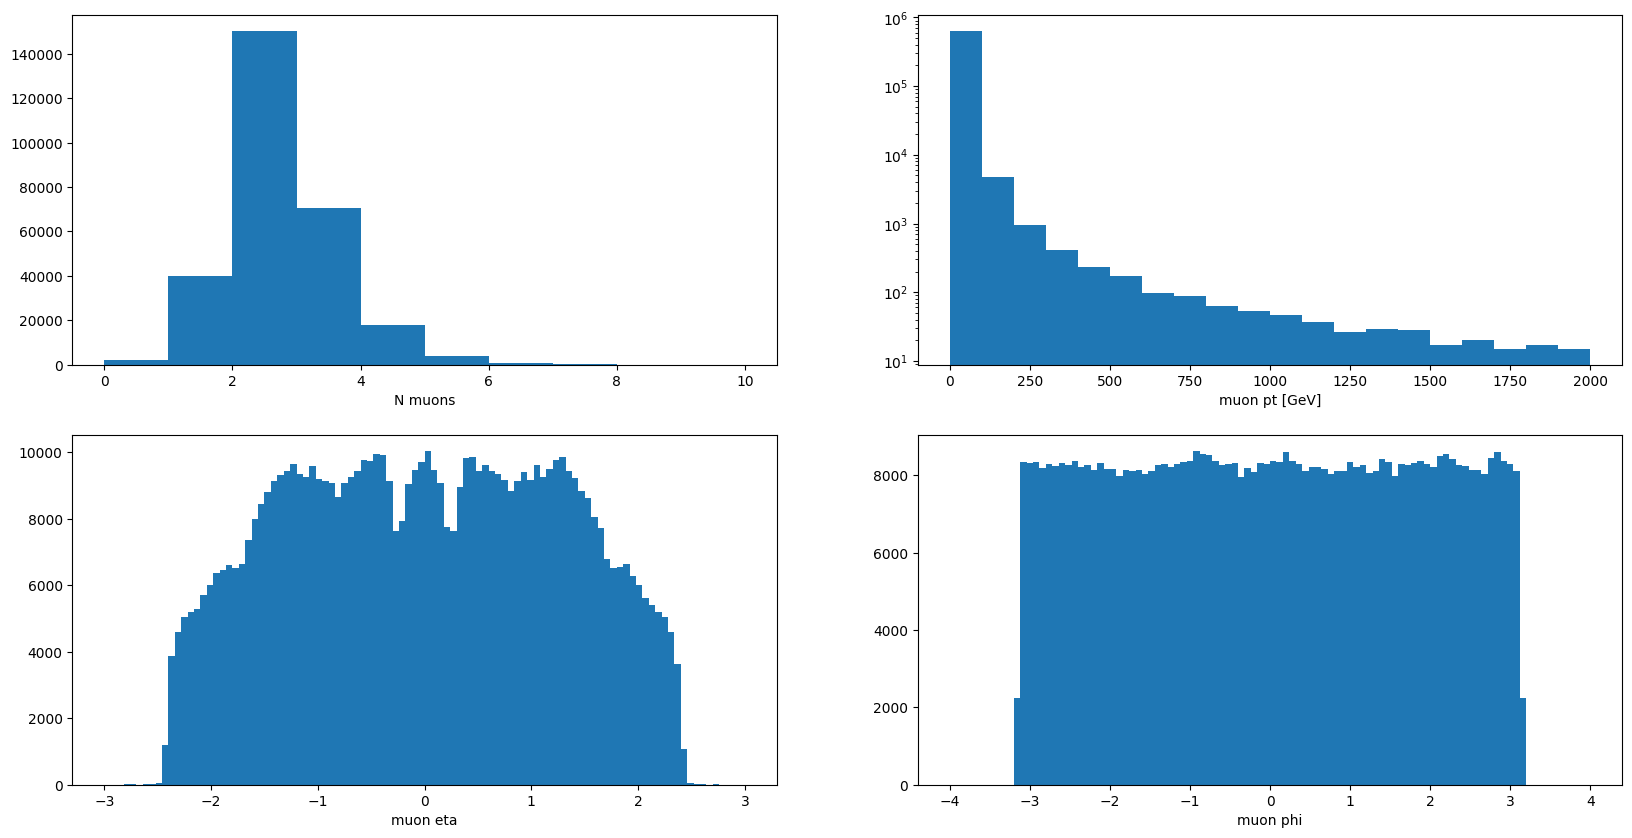

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

axes[0][0].hist(ak.num(df['Muon_pt']), bins=10, range=(0,10))
axes[0][0].set_xlabel('N muons')

axes[0][1].hist(ak.flatten(df['Muon_pt']), bins=20, range=(0,2000))
axes[0][1].set_xlabel('muon pt [GeV]')
axes[0][1].set_yscale('log')

axes[1][0].hist(ak.flatten(df['Muon_eta']), bins=100, range=(-3,3))
axes[1][0].set_xlabel('muon eta')

axes[1][1].hist(ak.flatten(df['Muon_phi']), bins=100, range=(-4,4))
axes[1][1].set_xlabel('muon phi')

Let's make some simple selections. We will select events with precisely 2 muons, each of which is a "global" muon (which we will use as a proxy for muon quality), and finally, requiring them to be of opposite charge.

In [19]:
muon_cut = (df['nMuon'] == 2)
print(muon_cut)

[True, True, True, True, True, True, ..., True, True, True, True, True, True]


What does this do?

This array of booleans can be used to select for elements in the data that either fulfill (or don't) the conditions that we specified. We can see how to apply the cut below and see how many events remain.

In [20]:
print(
    len(df)
)

df = df[muon_cut]

print(
    len(df)
)

150096
150096


A similar selection can be done to select for "global muons" which are muons which have matching muon tracks in the tracker and in the muon detector. `Muon_isGlobal` is boolean in nature already.

In [21]:
df['Muon_isGlobal']

<Array [[True, True], [...], ..., [False, True]] type='150096 * var * bool'>

We use the `awkward.all` function to test if all of the muons in one event are global. The `axis=1` means that we look at the pairs of inner elements in the array, rather than every single muon in the collection of events (which would be `axis=0`.

In [24]:
global_cut  = ak.all(df['Muon_isGlobal'], axis=1)
print(global_cut)

[True, True, True, True, True, True, ..., True, True, True, True, True, True]


In [25]:
df = df[global_cut]

We have a data frame with two global muons. Now let's collect these muons and construct four-momenta in order to make a calcuation of the [invariant mass](https://atlas.cern/glossary/mass) of the two muons:

In [28]:
muons = ak.zip({
    'pt': df.Muon_pt,
    'phi': df.Muon_phi,
    'eta': df.Muon_eta,
    'mass': df.Muon_mass,
    'charge': df.Muon_charge,
}, with_name='Momentum4D')

In [29]:
len(muons)

131528

We then make another selection for muons of opposite charge. Since the particles what we are looking for are neutral, then the muons that come from the decay should be of opposite charge.

In [30]:
oppsign_cut = muons[:,0].charge*muons[:,1].charge == -1
oppsign_cut

<Array [True, True, False, True, ..., True, True, True] type='131528 * bool'>

In [31]:
muons = muons[oppsign_cut]
len(muons)

100687

We construct the invariant mass, which basically applies the formula 

$M^2 = \left(\sum_i E_i\right)^2 - \left|\sum_i \vec{p}_i\right|^2$

In [33]:
M = (muons[:, 0] + muons[:, 1]).mass

Text(0, 0.5, 'Number of events')

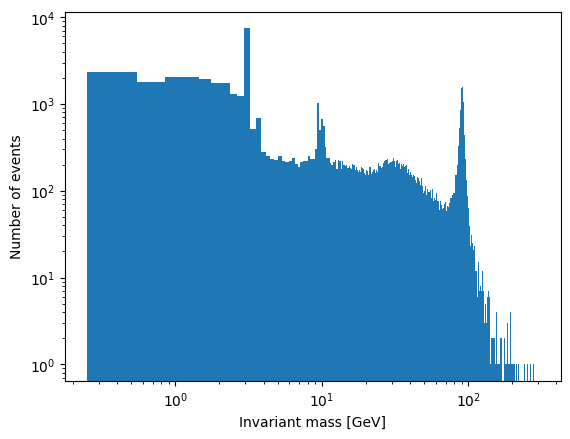

In [38]:
plt.hist(M, bins=1000, range=(0.25,300))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')

Let's adjust how we draw this histogram and label the peaks

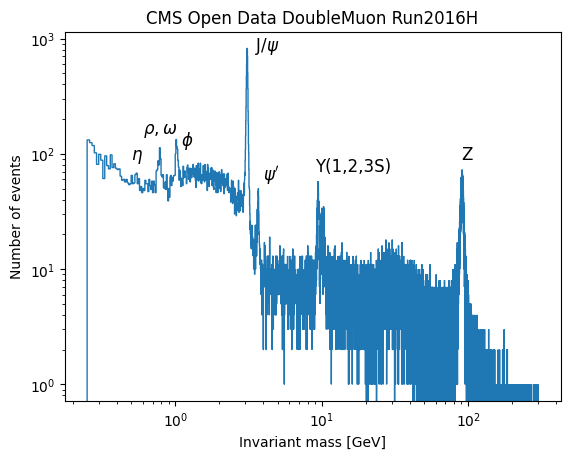

In [37]:
bins = np.linspace(0.25, 300, 30000)

counts, edges, _ = plt.hist(
    M,
    bins=bins,
    histtype='step',
    density=False
)

plt.xscale('log')
plt.yscale('log')

annotations = [
    (r"$\eta$", 0.50, 90),
    (r"$\rho,\omega$", 0.60, 150),
    (r"$\phi$", 1.10, 120),
    (r"J/$\psi$", 3.5, 800),
    (r"$\psi'$", 4.0, 60),
    (r"Y(1,2,3S)", 9.0, 70),
    (r"Z", 90.0, 90)
]

for a in annotations:
    plt.text(
        a[1], a[2], a[0],
        fontsize=12,
        color="black"
    )

plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events')
plt.title('CMS Open Data DoubleMuon Run2016H')
plt.show()